<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects/E_Signing_Of_Loan_Based_On_Financial_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
#import dependances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
#load dataset
dataset = pd.read_csv("/content/Financial-Data.csv")
dataset.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,...,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [78]:
dataset.shape

(17908, 21)

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

In [80]:
dataset.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622973,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [81]:
#check for null value
dataset.isnull().values.any()

False

In [82]:
#check categorical values
dataset.select_dtypes(include="object").columns

Index(['pay_schedule'], dtype='object')

In [83]:
dataset['pay_schedule'].unique()

array(['bi-weekly', 'weekly', 'semi-monthly', 'monthly'], dtype=object)

In [84]:
dataset['pay_schedule'].nunique()

4

In [85]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.head()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False


<Axes: xlabel='e_signed', ylabel='count'>

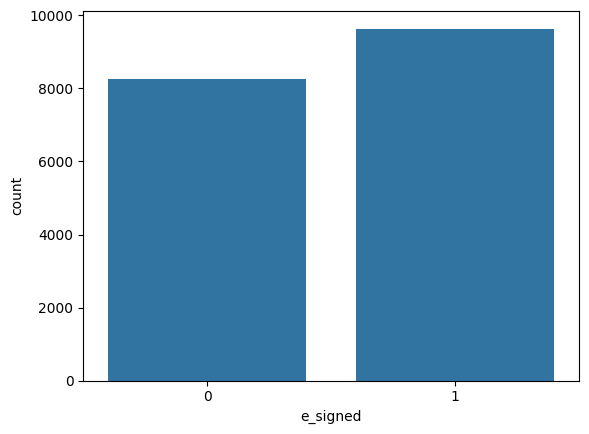

In [86]:
sns.countplot(data = dataset, x="e_signed")

In [87]:
(dataset.e_signed == 1).sum()

9639

In [88]:
(dataset.e_signed == 0).sum()

8269

In [89]:
dataset.head()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,...,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,7629673,40,1,3135,0,3,3,6,2,1,...,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False
1,3560428,61,0,3180,0,6,3,2,7,1,...,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True
2,6934997,23,0,1540,6,0,0,7,1,1,...,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True
3,5682812,40,0,5230,0,6,1,2,7,1,...,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False
4,5335819,33,0,3590,0,5,2,2,8,1,...,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False


In [90]:
dataset["months employed"] = (dataset.months_employed + dataset.years_employed * 12)
dataset = dataset.drop(columns=["months_employed", "years_employed"])
dataset.head()

,Entry_id,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,...,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed
0,7629673,40,1,3135,3,6,2,1,550,36200,...,0.487712,0.515977,0.580918,0.380918,10,1,False,False,False,36
1,3560428,61,0,3180,3,2,7,1,600,30150,...,0.713423,0.826402,0.730720,0.630720,9,0,False,False,True,72
2,6934997,23,0,1540,0,7,1,1,450,34550,...,0.595018,0.762284,0.531712,0.531712,7,0,False,False,True,6
3,5682812,40,0,5230,1,2,7,1,700,42150,...,0.767828,0.778831,0.792552,0.592552,8,1,False,False,False,72
4,5335819,33,0,3590,2,2,8,1,1100,53850,...,0.613487,0.665523,0.744634,0.744634,12,0,False,True,False,60


In [91]:
dataset["personal_account_months"] = (dataset.personal_account_m + dataset.personal_account_y * 12)
dataset = dataset.drop(columns=["personal_account_m", "personal_account_y"])
dataset.head()

,Entry_id,age,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,...,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly,months employed,personal_account_months
0,7629673,40,1,3135,3,1,550,36200,0.737398,0.903517,...,0.515977,0.580918,0.380918,10,1,False,False,False,36,30
1,3560428,61,0,3180,3,1,600,30150,0.738510,0.881027,...,0.826402,0.730720,0.630720,9,0,False,False,True,72,86
2,6934997,23,0,1540,0,1,450,34550,0.642993,0.766554,...,0.762284,0.531712,0.531712,7,0,False,False,True,6,19
3,5682812,40,0,5230,1,1,700,42150,0.665224,0.960832,...,0.778831,0.792552,0.592552,8,1,False,False,False,72,86
4,5335819,33,0,3590,2,1,1100,53850,0.617361,0.857560,...,0.665523,0.744634,0.744634,12,0,False,True,False,60,98


<Axes: title={'center': 'Correslated with e_signed'}>

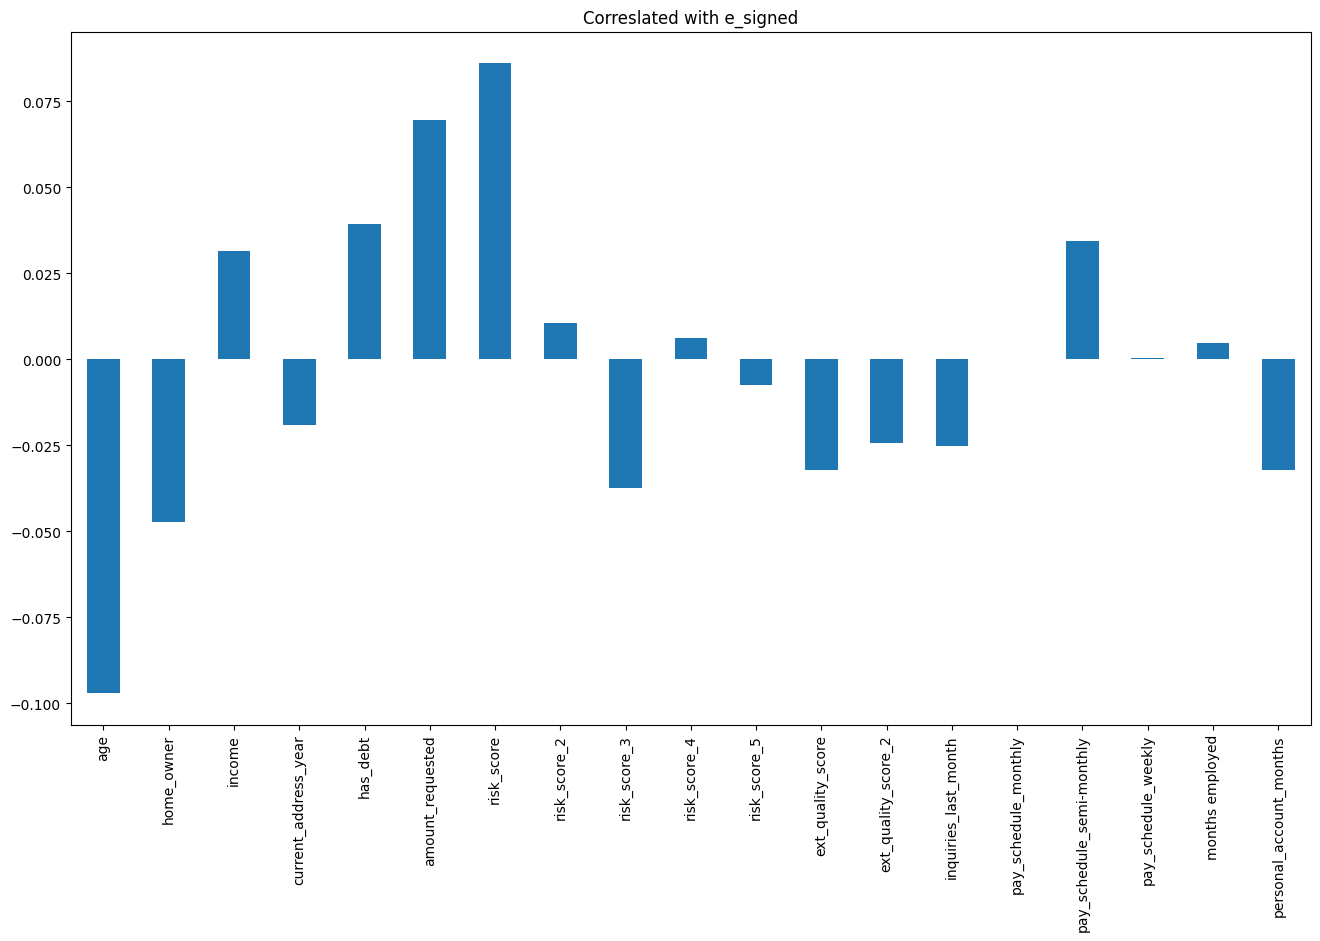

In [95]:
data = dataset.drop(columns=["Entry_id", "e_signed"])
data.corrwith(dataset["e_signed"]).plot.bar(
    figsize=(16, 9), title="Correslated with e_signed"
)

<Axes: >

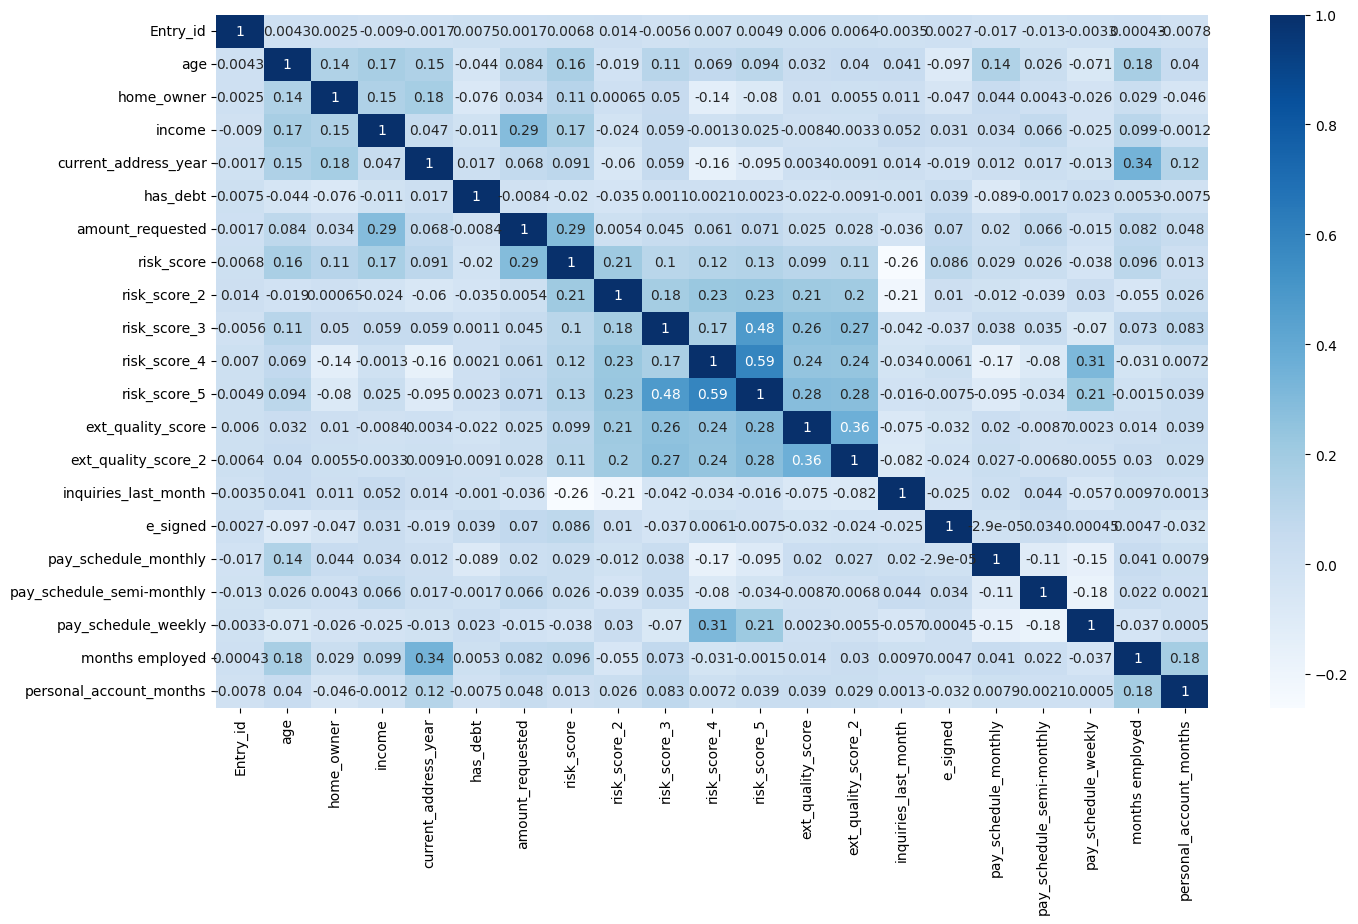

In [96]:
#correlation
plt.figure(figsize=(16, 9))
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap="Blues")